In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

import warnings
warnings.filterwarnings("ignore")

In [ ]:
N = 3
M = 4
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.5, 9), 2)

energy_gap_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    energy_gap_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            energy_gap_grid[i,j] = eigenvalues[1] - eigenvalues[0]

    energy_gap_grids.append(energy_gap_grid)
    global_min = min(global_min, np.min(energy_gap_grid))
    global_max = max(global_max, np.max(energy_gap_grid))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    sigma_grid = energy_gap_grids[idx]
    im = ax.imshow(
        sigma_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r"$\Delta E = E_1 - E_0$")
fig.suptitle(f"Energy gap for $N={N}$, $M={M}$, $V={V}$", y=0.91)

plt.show()

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    gap_grid = energy_gap_grids[idx]
    
    # Avoid division by zero
    safe_gap_grid = np.clip(gap_grid, 1e-10, None)  # Gaps no smaller than 1e-10
    log_inv_gap = np.log10(1 / safe_gap_grid)
    log_inv_gap = np.clip(log_inv_gap, None, 10)    # Clip max value to 10

    im = ax.imshow(
        log_inv_gap,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=0,
    )
    ax.text(
        0.97, 0.97,
        f"$V_2 = {V2_values[idx]:.2f}$",
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=10,
        bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
    )

    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r"$\log_{10}(1 / \Delta E)$")
fig.suptitle(f"Log inverse energy gap for $N={N}$, $M={M}$, $V={V}$", y=0.91)

plt.show()



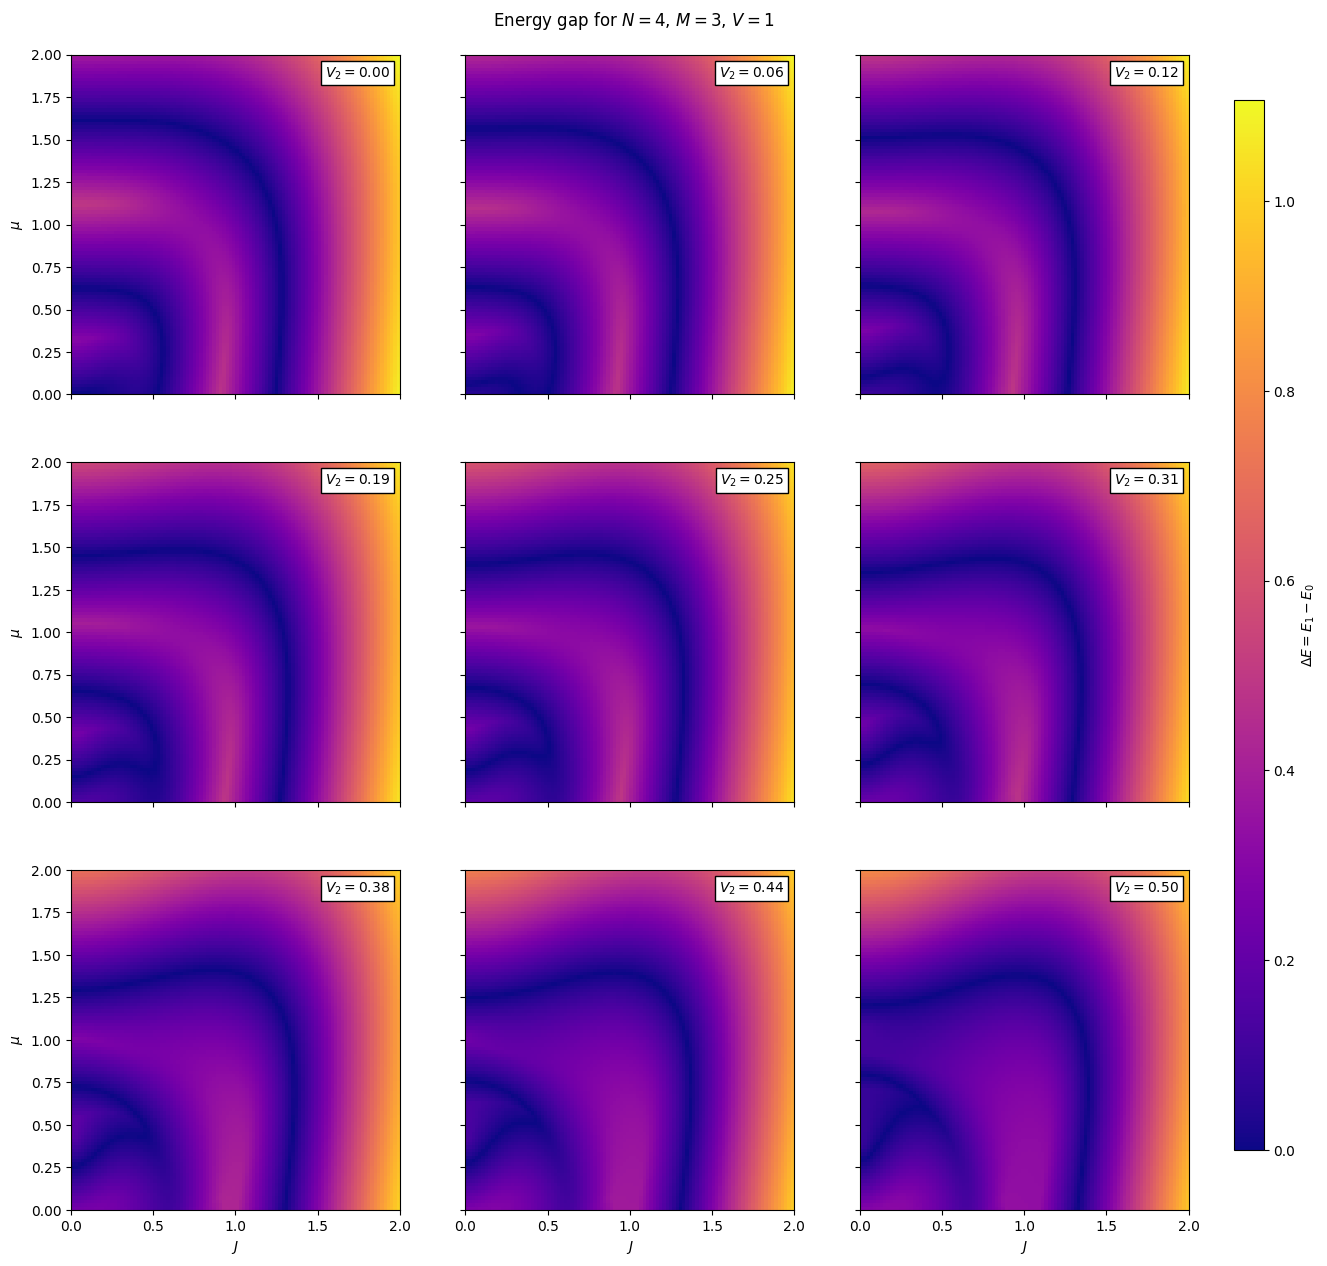

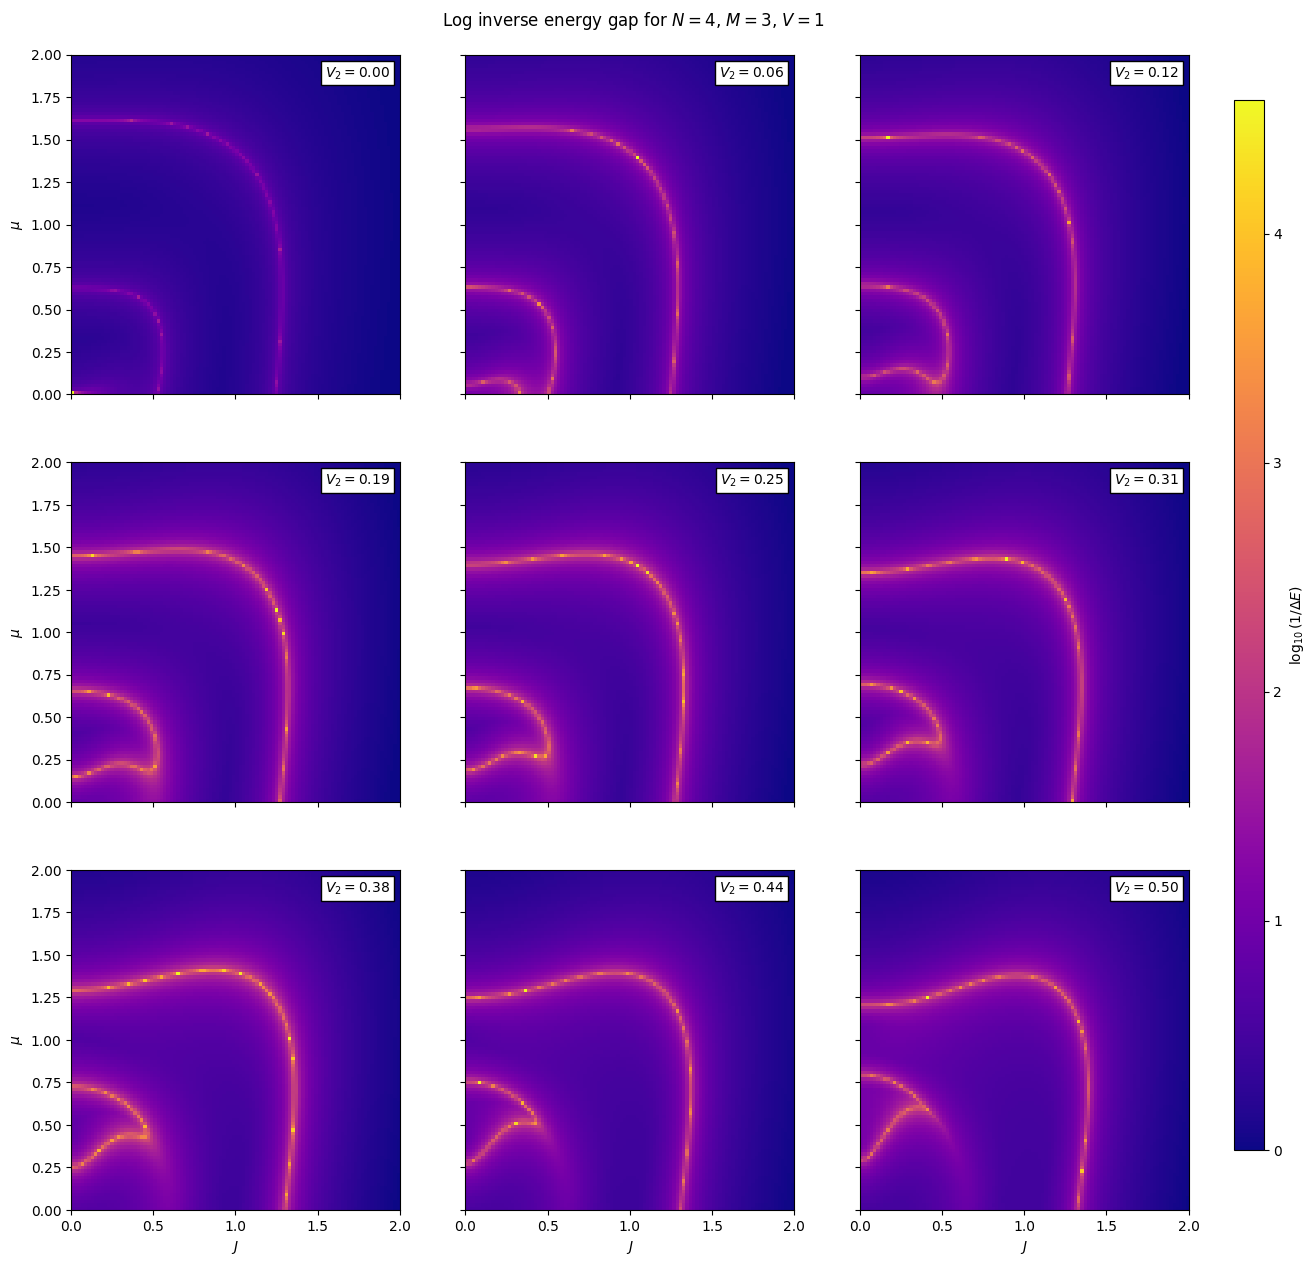

In [ ]:
N = 4
M = 4
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.5, 9), 2)

energy_gap_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    energy_gap_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            energy_gap_grid[i,j] = eigenvalues[1] - eigenvalues[0]

    energy_gap_grids.append(energy_gap_grid)
    global_min = min(global_min, np.min(energy_gap_grid))
    global_max = max(global_max, np.max(energy_gap_grid))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    sigma_grid = energy_gap_grids[idx]
    im = ax.imshow(
        sigma_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r"$\Delta E = E_1 - E_0$")
fig.suptitle(f"Energy gap for $N={N}$, $M={M}$, $V={V}$", y=0.91)

plt.show()

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    gap_grid = energy_gap_grids[idx]
    
    # Avoid division by zero
    safe_gap_grid = np.clip(gap_grid, 1e-10, None)  # Gaps no smaller than 1e-10
    log_inv_gap = np.log10(1 / safe_gap_grid)
    log_inv_gap = np.clip(log_inv_gap, None, 10)    # Clip max value to 10

    im = ax.imshow(
        log_inv_gap,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=0,
    )
    ax.text(
        0.97, 0.97,
        f"$V_2 = {V2_values[idx]:.2f}$",
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=10,
        bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
    )

    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r"$\log_{10}(1 / \Delta E)$")
fig.suptitle(f"Log inverse energy gap for $N={N}$, $M={M}$, $V={V}$", y=0.91)

plt.show()



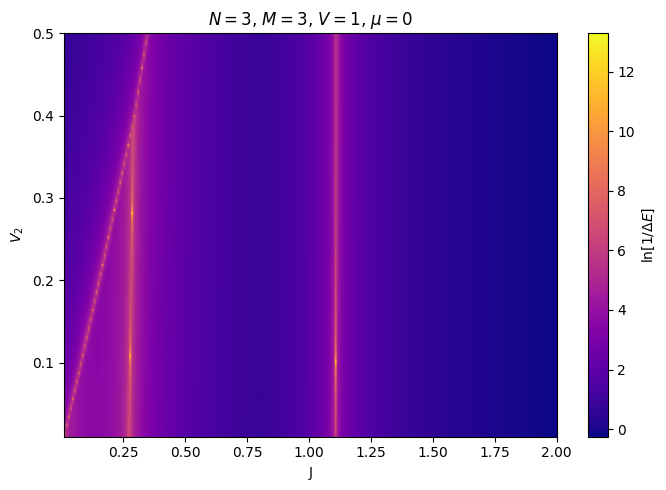

In [31]:
N = 3
M = 3
V = 1
mu = 0 

states, _ = enumerate_states(N, M)

Js = np.linspace(0.01, 2, 250)
V2s = np.linspace(0.01, 0.5, 250)

energy_gap_grid = np.zeros((len(V2s), len(Js)), dtype=np.float64)

for i, V2 in enumerate(V2s):
    for j, J in enumerate(Js):
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2 = V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap_grid[i,j] = eigenvalues[1] - eigenvalues[0]
        
fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    np.log(1/energy_gap_grid),
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], V2s[0], V2s[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label="$\ln [1 / \Delta E]$")
ax.set_xlabel("J")
ax.set_ylabel(r"$V_2$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$, $\mu = {mu}$")
plt.tight_layout()
plt.show()


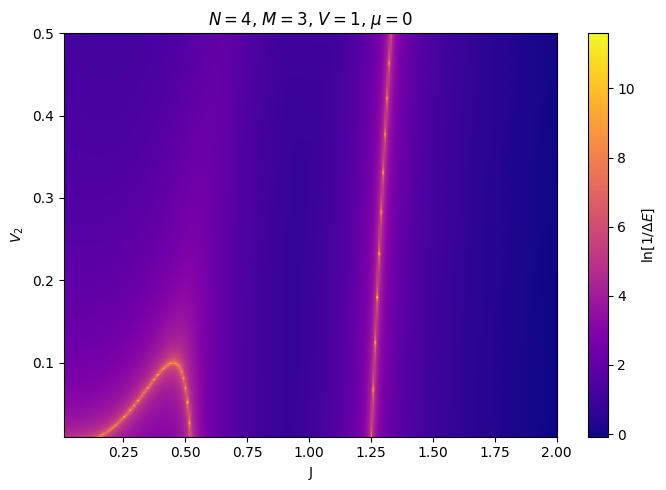

In [32]:
N = 4
M = 3
V = 1
mu = 0 

states, _ = enumerate_states(N, M)

Js = np.linspace(0.01, 2, 250)
V2s = np.linspace(0.01, 0.5, 250)

energy_gap_grid = np.zeros((len(V2s), len(Js)), dtype=np.float64)

for i, V2 in enumerate(V2s):
    for j, J in enumerate(Js):
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2 = V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap_grid[i,j] = eigenvalues[1] - eigenvalues[0]
        
fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    np.log(1/energy_gap_grid),
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], V2s[0], V2s[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label="$\ln [1 / \Delta E]$")
ax.set_xlabel("J")
ax.set_ylabel(r"$V_2$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$, $\mu = {mu}$")
plt.tight_layout()
plt.show()


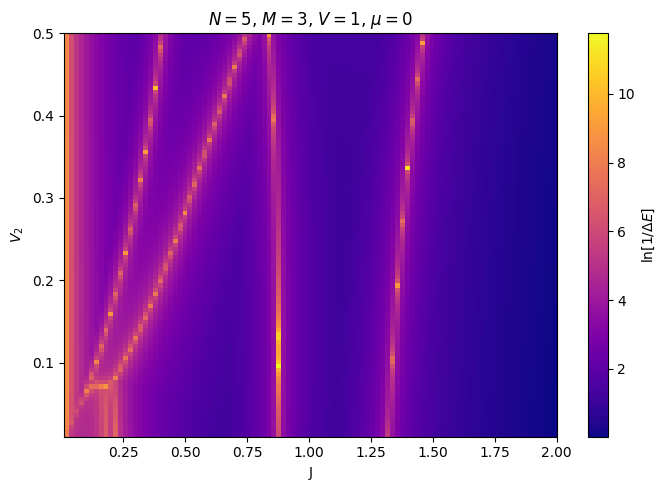

In [27]:
N = 5
M = 3
V = 1
mu = 0 

states, _ = enumerate_states(N, M)

Js = np.linspace(0.01, 2, 100)
V2s = np.linspace(0.01, 0.5, 100)

energy_gap_grid = np.zeros((len(V2s), len(Js)), dtype=np.float64)

for i, V2 in enumerate(V2s):
    for j, J in enumerate(Js):
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2 = V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap_grid[i,j] = eigenvalues[1] - eigenvalues[0]
        
fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    np.log(1/energy_gap_grid),
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], V2s[0], V2s[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label="$\ln [1 / \Delta E]$")
ax.set_xlabel("J")
ax.set_ylabel(r"$V_2$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$, $\mu = {mu}$")
plt.tight_layout()
plt.show()


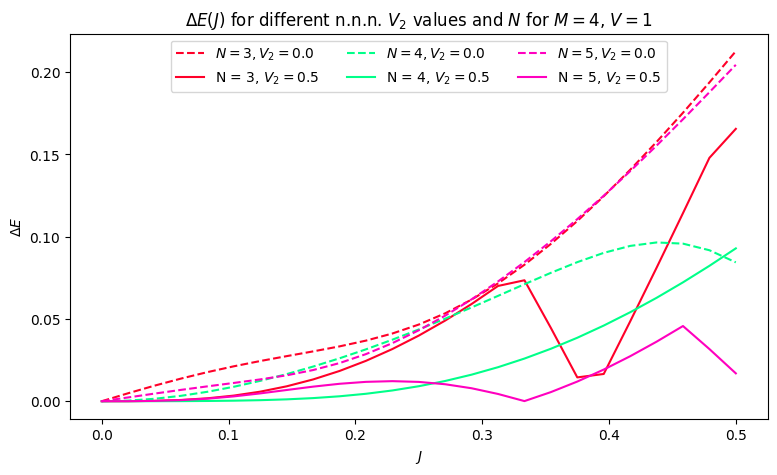

In [7]:
fig, ax = plt.subplots(figsize = (9,5))

M = 4
V = 1
mu = 0
V2s = np.linspace(0, 0.5, 2)
Js = np.linspace(0, 0.5, 25)
colors = get_cmap("gist_rainbow", 3)

for idx, N in enumerate([3,4,5]):
    for i, V2 in enumerate(V2s):
            energy_eigenvalues = []
            for j, J in enumerate(Js):
                    hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2 = V2)
                    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
                    energy_eigenvalues.append(eigenvalues)

            energy_eigenvalues = np.array(energy_eigenvalues)
            
            if V2 == 0:
                    ax.plot(Js, energy_eigenvalues[:,1] - energy_eigenvalues[:,0], linestyle = "--", color = colors(idx), label = f"$N = {N}, V_2 = {np.round(V2,2)}$") 
            else:
                    ax.plot(Js, energy_eigenvalues[:,1] - energy_eigenvalues[:,0], color = colors(idx), label = f"N = {N}, $V_2 = {np.round(V2,2)}$")

    ax.legend(loc = "upper center", ncols = 3)
    ax.set_title(f"$\Delta E (J)$ for different n.n.n. $V_2$ values and $N$ for $M={M}$, $V={V}$")
    ax.set_xlabel("$J$")
    ax.set_ylabel("$\Delta E$")


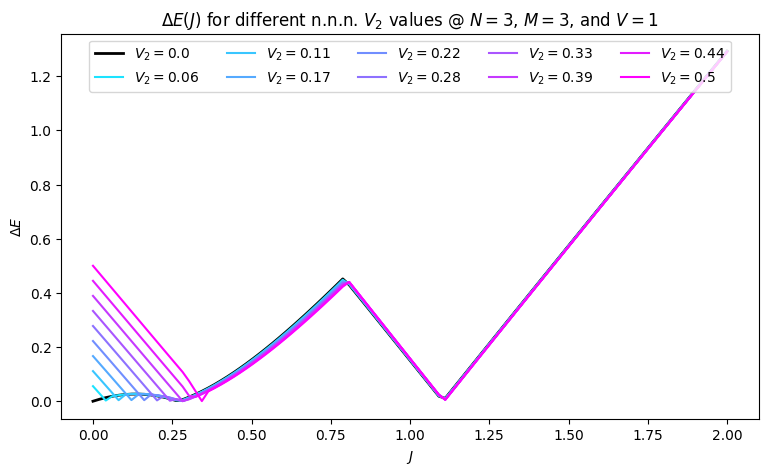

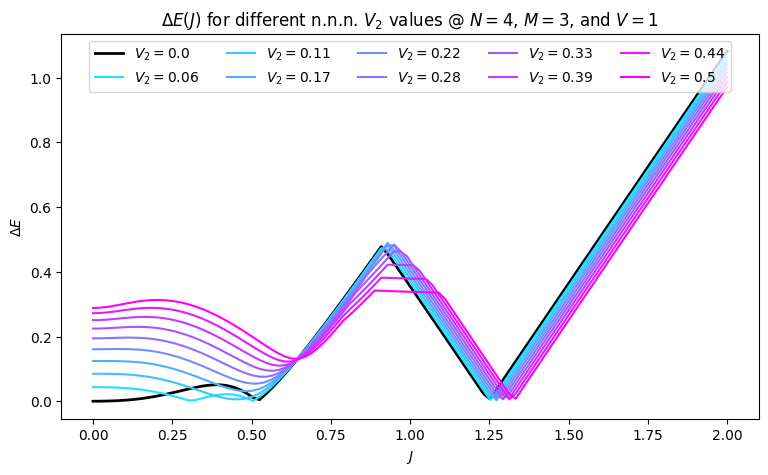

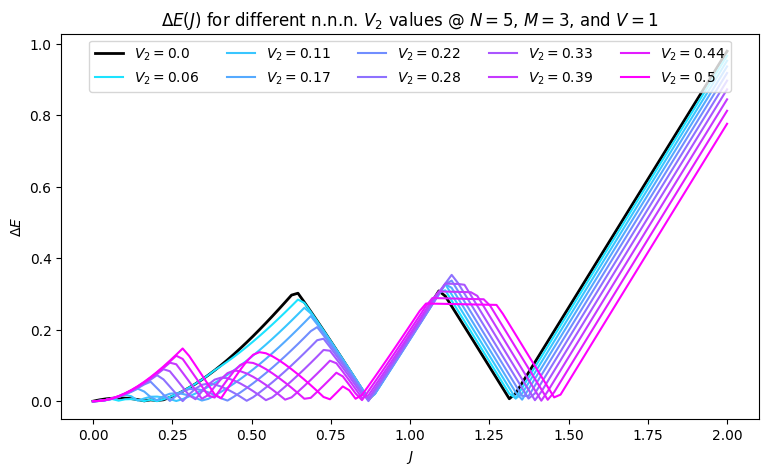

In [33]:
for N in [3,4,5]:
    M = 3
    V = 1
    mu = 0
    V2s = np.linspace(0, 0.5, 10)
    Js = np.linspace(0, 2, 100)


    states, _ = enumerate_states(N, M)
    colors = get_cmap("cool", len(V2s))

    fig, ax = plt.subplots(figsize = (9,5))
    for i, V2 in enumerate(V2s):
            energy_eigenvalues = []
            for j, J in enumerate(Js):
                    hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2 = V2)
                    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
                    energy_eigenvalues.append(eigenvalues)

            energy_eigenvalues = np.array(energy_eigenvalues)
            
            if V2 == 0:
                    ax.plot(Js, energy_eigenvalues[:,1] - energy_eigenvalues[:,0], color = "k", label = f"$V_2 = {np.round(V2,2)}$", linewidth = 2) 
            else:
                    ax.plot(Js, energy_eigenvalues[:,1] - energy_eigenvalues[:,0], color = colors(i), label = f"$V_2 = {np.round(V2,2)}$")

    ax.legend(loc = "upper center", ncols = 5)
    ax.set_title(f"$\Delta E (J)$ for different n.n.n. $V_2$ values @ $N={N}$, $M={M}$, and $V={V}$")
    ax.set_xlabel("$J$")
    ax.set_ylabel("$\Delta E$")


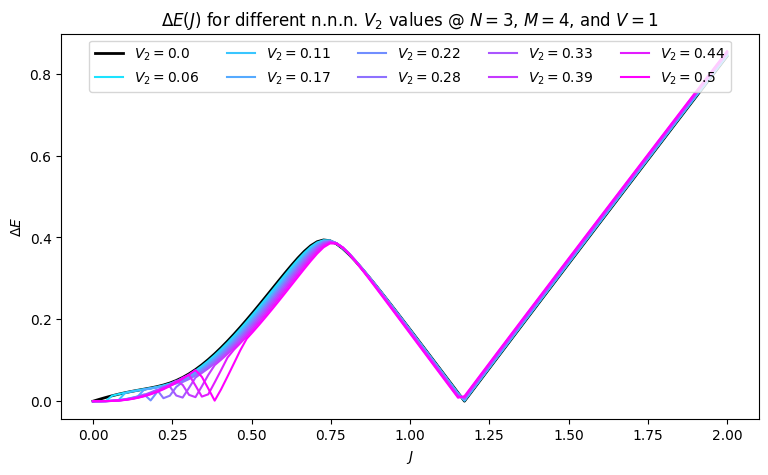

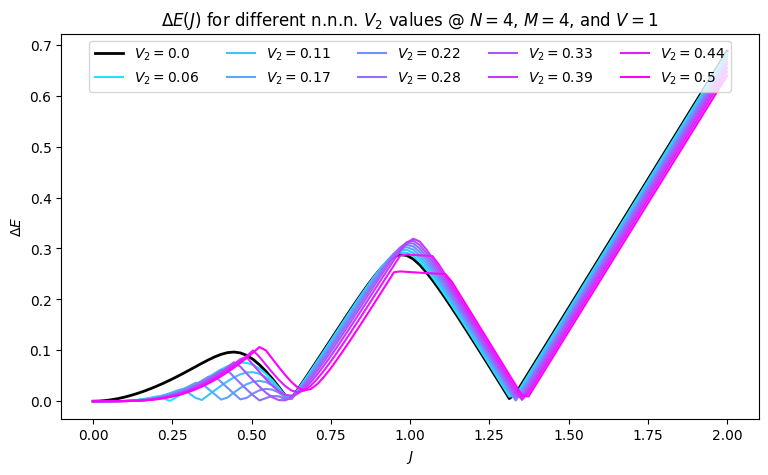

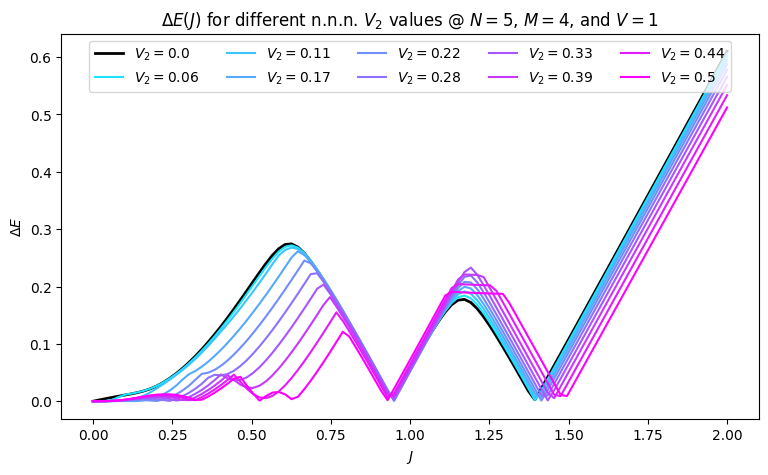

In [34]:
for N in [3,4,5]:
    M = 4
    V = 1
    mu = 0
    V2s = np.linspace(0, 0.5, 10)
    Js = np.linspace(0, 2, 100)


    states, _ = enumerate_states(N, M)
    colors = get_cmap("cool", len(V2s))

    fig, ax = plt.subplots(figsize = (9,5))
    for i, V2 in enumerate(V2s):
            energy_eigenvalues = []
            for j, J in enumerate(Js):
                    hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2 = V2)
                    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
                    energy_eigenvalues.append(eigenvalues)

            energy_eigenvalues = np.array(energy_eigenvalues)
            
            if V2 == 0:
                    ax.plot(Js, energy_eigenvalues[:,1] - energy_eigenvalues[:,0], color = "k", label = f"$V_2 = {np.round(V2,2)}$", linewidth = 2) 
            else:
                    ax.plot(Js, energy_eigenvalues[:,1] - energy_eigenvalues[:,0], color = colors(i), label = f"$V_2 = {np.round(V2,2)}$")

    ax.legend(loc = "upper center", ncols = 5)
    ax.set_title(f"$\Delta E (J)$ for different n.n.n. $V_2$ values @ $N={N}$, $M={M}$, and $V={V}$")
    ax.set_xlabel("$J$")
    ax.set_ylabel("$\Delta E$")


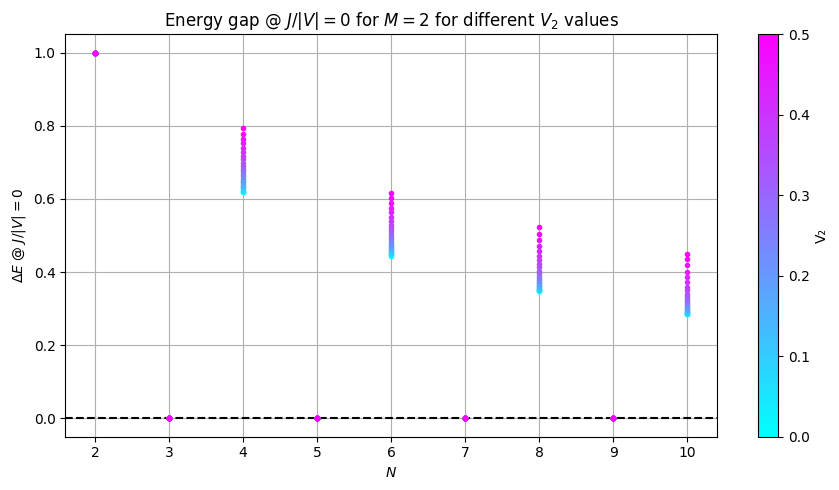

In [30]:
M = 2
V = 1

Ns = [2,3,4,5,6,7,8,9,10]
V2s = np.linspace(0, 0.5, 25)

states, _ = enumerate_states(N, M)  # You must define N here
colors = get_cmap("cool")

fig, ax = plt.subplots(figsize=(9, 5))
ax.axhline(y = 0, linestyle = "--", color = "k")
norm = Normalize(vmin=V2s.min(), vmax=V2s.max())  # Normalize for color mapping

for N in Ns:
    for V2 in V2s:
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu=0, J=0, V2=V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap = eigenvalues[1] - eigenvalues[0]
        ax.plot(N, energy_gap, '.', color=colors(norm(V2)))

# Create the colorbar
sm = ScalarMappable(norm=norm, cmap=colors)
sm.set_array([])  # Required for older matplotlib versions
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("V₂")

ax.set_title(f"Energy gap @ $J/|V| = 0$ for $M = {M}$ for different $V_2$ values")
ax.set_xlabel("$N$")
ax.set_ylabel("$\Delta E$ @ $J/|V| = 0$")
ax.set_xticks([2,3,4,5,6,7,8,9,10])

plt.grid()

plt.tight_layout()
plt.show()



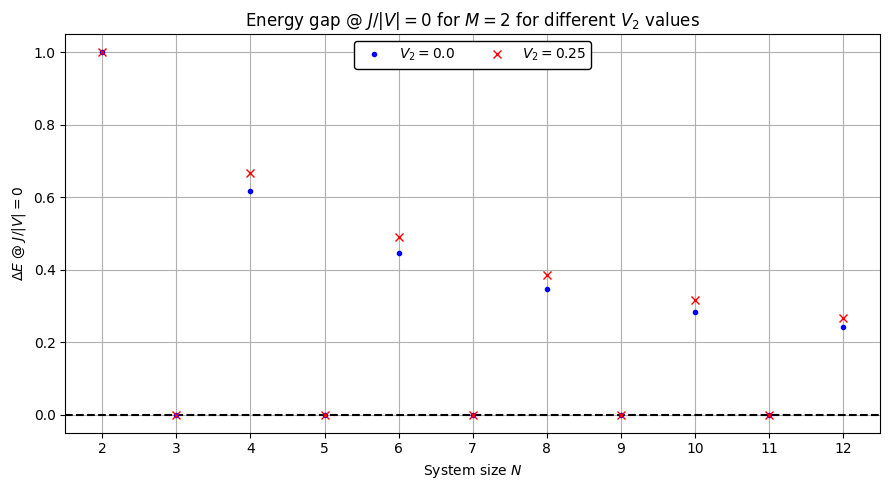

In [ ]:
# seeing how when I add V2 whether my gap opens or remains closed at J/V = 0 as a function of system size

M = 2
V = 1

Ns = [2,3,4,5,6,7,8,9,10,11,12]
V2s = np.linspace(0, 0.25, 2)

fig, ax = plt.subplots(figsize=(9, 5))
ax.axhline(y = 0, linestyle = "--", color = "k")

for N in Ns:
    for V2 in V2s:
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu=0, J=0, V2=V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap = eigenvalues[1] - eigenvalues[0]
        
        if N == min(Ns):
            if V2 == 0:
                ax.plot(N, energy_gap, '.', color = "b", label = f"$V_2 = {np.round(V2,3)}$")
            else:
                ax.plot(N, energy_gap, "x", color = "r", label = f"$V_2 = {np.round(V2,3)}$") 
        else:
            if V2 == 0:
                ax.plot(N, energy_gap, '.', color = "b")
            else:
                ax.plot(N, energy_gap, "x", color = "r")
        

ax.set_title(f"Energy gap @ $J/|V| = 0$ for $M = {M}$ for different $V_2$ values")
ax.set_xlabel("System size $N$")
ax.set_ylabel("$\Delta E$ @ $J/|V| = 0$")
ax.set_xticks(Ns)
ax.legend(loc = "upper center", ncols = 2, frameon = True, edgecolor = "black", framealpha = 1, fancybox = True)

plt.grid()

plt.tight_layout()
plt.show()



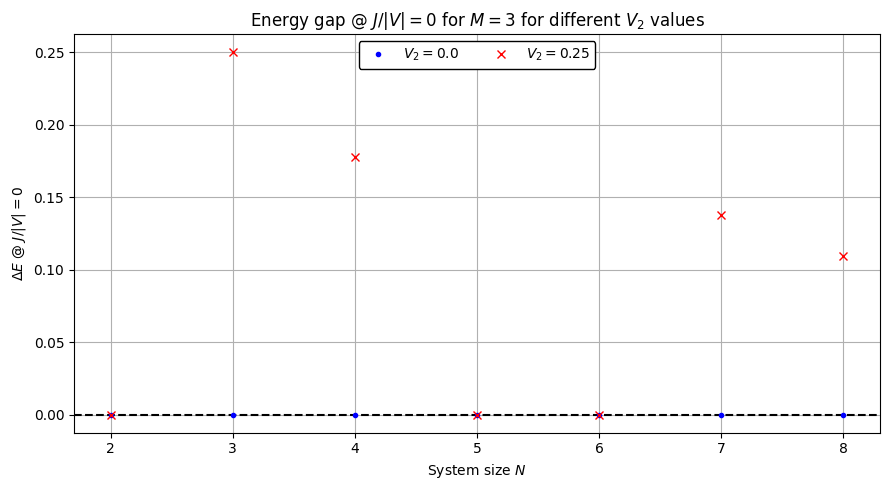

In [ ]:
# seeing how when I add V2 whether my gap opens or remains closed at J/V = 0 as a function of system size

M = 3
V = 1

Ns = [2,3,4,5,6,7,8]
V2s = np.linspace(0, 0.25, 2)

fig, ax = plt.subplots(figsize=(9, 5))
ax.axhline(y = 0, linestyle = "--", color = "k")

for N in Ns:
    for V2 in V2s:
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu=0, J=0, V2=V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap = eigenvalues[1] - eigenvalues[0]
        
        if N == min(Ns):
            if V2 == 0:
                ax.plot(N, energy_gap, '.', color = "b", label = f"$V_2 = {np.round(V2,3)}$")
            else:
                ax.plot(N, energy_gap, "x", color = "r", label = f"$V_2 = {np.round(V2,3)}$") 
        else:
            if V2 == 0:
                ax.plot(N, energy_gap, '.', color = "b")
            else:
                ax.plot(N, energy_gap, "x", color = "r")
        

ax.set_title(f"Energy gap @ $J/|V| = 0$ for $M = {M}$ for different $V_2$ values")
ax.set_xlabel("System size $N$")
ax.set_ylabel("$\Delta E$ @ $J/|V| = 0$")
ax.set_xticks(Ns)
ax.legend(loc = "upper center", ncols = 2, frameon = True, edgecolor = "black", framealpha = 1, fancybox = True)

plt.grid()

plt.tight_layout()
plt.show()



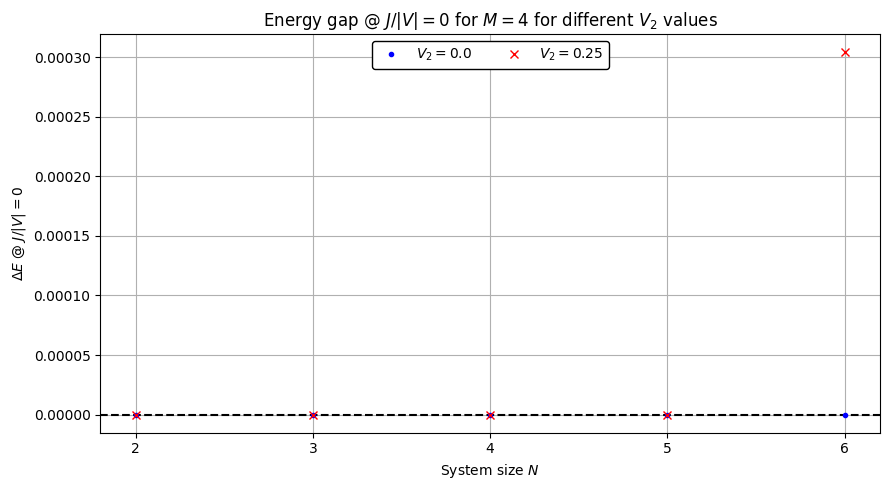

In [ ]:
# seeing how when I add V2 whether my gap opens or remains closed at J/V = 0 as a function of system size

M = 4
V = 1

Ns = [2,3,4,5,6]
V2s = np.linspace(0, 0.25, 2)

fig, ax = plt.subplots(figsize=(9, 5))
ax.axhline(y = 0, linestyle = "--", color = "k")

for N in Ns:
    for V2 in V2s:
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu=0, J=0, V2=V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap = eigenvalues[1] - eigenvalues[0]
        
        if N == min(Ns):
            if V2 == 0:
                ax.plot(N, energy_gap, '.', color = "b", label = f"$V_2 = {np.round(V2,3)}$")
            else:
                ax.plot(N, energy_gap, "x", color = "r", label = f"$V_2 = {np.round(V2,3)}$") 
        else:
            if V2 == 0:
                ax.plot(N, energy_gap, '.', color = "b")
            else:
                ax.plot(N, energy_gap, "x", color = "r")
        

ax.set_title(f"Energy gap @ $J/|V| = 0$ for $M = {M}$ for different $V_2$ values")
ax.set_xlabel("System size $N$")
ax.set_ylabel("$\Delta E$ @ $J/|V| = 0$")
ax.set_xticks(Ns)
ax.legend(loc = "upper center", ncols = 2, frameon = True, edgecolor = "black", framealpha = 1, fancybox = True)

plt.grid()

plt.tight_layout()
plt.show()



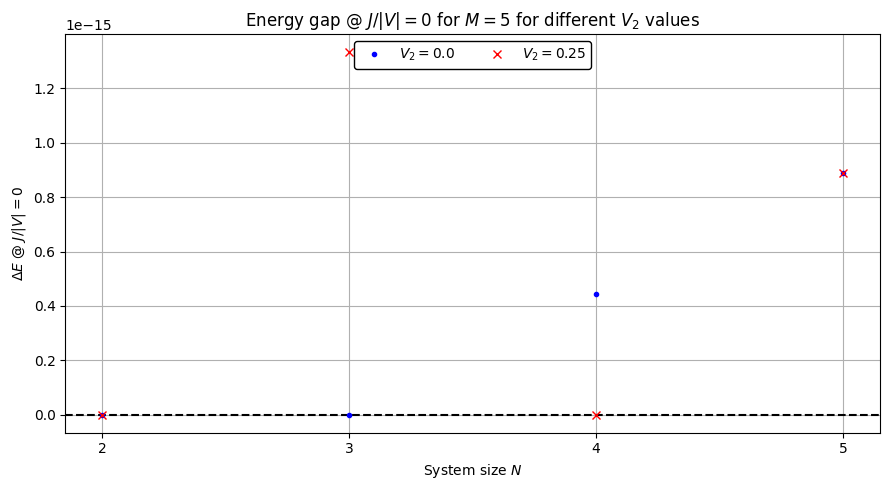

In [ ]:
# seeing how when I add V2 whether my gap opens or remains closed at J/V = 0 as a function of system size

M = 5
V = 1

Ns = [2,3,4,5]
V2s = np.linspace(0, 0.25, 2)

fig, ax = plt.subplots(figsize=(9, 5))
ax.axhline(y = 0, linestyle = "--", color = "k")

for N in Ns:
    for V2 in V2s:
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu=0, J=0, V2=V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap = eigenvalues[1] - eigenvalues[0]
        
        if N == min(Ns):
            if V2 == 0:
                ax.plot(N, energy_gap, '.', color = "b", label = f"$V_2 = {np.round(V2,3)}$")
            else:
                ax.plot(N, energy_gap, "x", color = "r", label = f"$V_2 = {np.round(V2,3)}$") 
        else:
            if V2 == 0:
                ax.plot(N, energy_gap, '.', color = "b")
            else:
                ax.plot(N, energy_gap, "x", color = "r")
        

ax.set_title(f"Energy gap @ $J/|V| = 0$ for $M = {M}$ for different $V_2$ values")
ax.set_xlabel("System size $N$")
ax.set_ylabel("$\Delta E$ @ $J/|V| = 0$")
ax.set_xticks(Ns)
ax.legend(loc = "upper center", ncols = 2, frameon = True, edgecolor = "black", framealpha = 1, fancybox = True)

plt.grid()

plt.tight_layout()
plt.show()



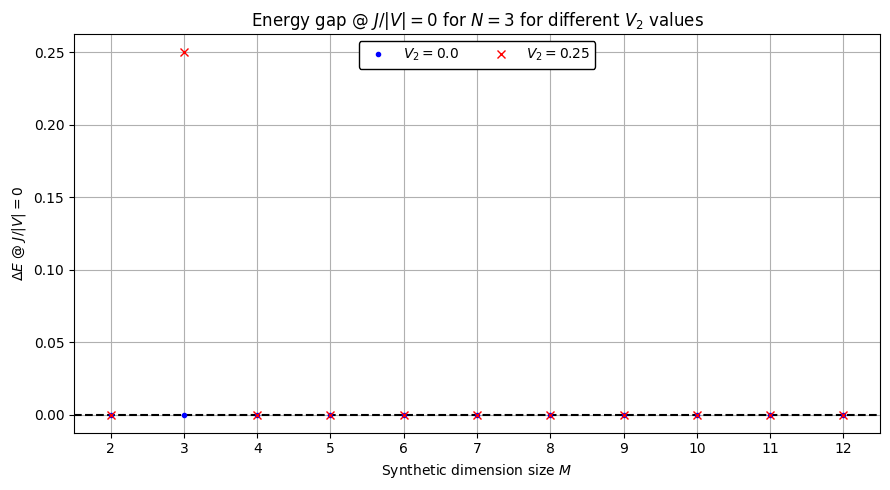

In [ ]:
# seeing how when I add V2 whether my gap opens or remains closed at J/V = 0 as a function of system size

N = 3
V = 1

Ms = [2,3,4,5,6,7,8,9,10,11,12]
V2s = np.linspace(0, 0.25, 2)

fig, ax = plt.subplots(figsize=(9, 5))
ax.axhline(y = 0, linestyle = "--", color = "k")

for M in Ms:
    for V2 in V2s:
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu=0, J=0, V2=V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap = eigenvalues[1] - eigenvalues[0]
        
        if M == min(Ms):
            if V2 == 0:
                ax.plot(M, energy_gap, '.', color = "b", label = f"$V_2 = {np.round(V2,3)}$")
            else:
                ax.plot(M, energy_gap, "x", color = "r", label = f"$V_2 = {np.round(V2,3)}$") 
        else:
            if V2 == 0:
                ax.plot(M, energy_gap, '.', color = "b")
            else:
                ax.plot(M, energy_gap, "x", color = "r")
        

ax.set_title(f"Energy gap @ $J/|V| = 0$ for $N = {N}$ for different $V_2$ values")
ax.set_xlabel("Synthetic dimension size $M$")
ax.set_ylabel("$\Delta E$ @ $J/|V| = 0$")
ax.set_xticks(Ms)
ax.legend(loc = "upper center", ncols = 2, frameon = True, edgecolor = "black", framealpha = 1, fancybox = True)

plt.grid()

plt.tight_layout()
plt.show()



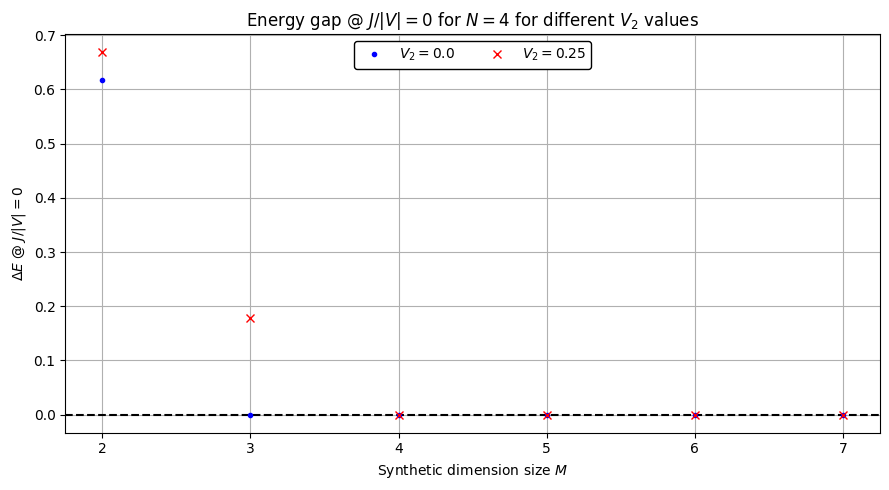

In [ ]:
# seeing how when I add V2 whether my gap opens or remains closed at J/V = 0 as a function of system size

N = 4
V = 1

Ms = [2,3,4,5,6,7]
V2s = np.linspace(0, 0.25, 2)

fig, ax = plt.subplots(figsize=(9, 5))
ax.axhline(y = 0, linestyle = "--", color = "k")

for M in Ms:
    for V2 in V2s:
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu=0, J=0, V2=V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
        energy_gap = eigenvalues[1] - eigenvalues[0]
        
        if M == min(Ms):
            if V2 == 0:
                ax.plot(M, energy_gap, '.', color = "b", label = f"$V_2 = {np.round(V2,3)}$")
            else:
                ax.plot(M, energy_gap, "x", color = "r", label = f"$V_2 = {np.round(V2,3)}$") 
        else:
            if V2 == 0:
                ax.plot(M, energy_gap, '.', color = "b")
            else:
                ax.plot(M, energy_gap, "x", color = "r")
        

ax.set_title(f"Energy gap @ $J/|V| = 0$ for $N = {N}$ for different $V_2$ values")
ax.set_xlabel("Synthetic dimension size $M$")
ax.set_ylabel("$\Delta E$ @ $J/|V| = 0$")
ax.set_xticks(Ms)
ax.legend(loc = "upper center", ncols = 2, frameon = True, edgecolor = "black", framealpha = 1, fancybox = True)

plt.grid()

plt.tight_layout()
plt.show()

